# Introduction to Hub Initiatives and Sites

In this sample notebook we will demonstrate how to search for initiatives across a Hub, create a new initiative and edit the layout of its site, link and unlink a page to that site, and clone a site. We will also clone the same site to an Enterprise organization to demonstrate cross-platform cloning of Hub Sites. Finally, we will demonstrate how a site can be fetched using its domain. 

In [1]:
from arcgis.gis import GIS

### Login to Hub

In the interest of demonstrating the Hub Premium `Initiative`, we will sign into a Hub. Sign-in with your ArcGIS credentials while executing this sample notebook to leverage the capabilities of your Hub/Sites licensing.

In [2]:
gis = GIS(profile="your_online_hub_premium_profile")

Enter password: ········


In [3]:
myhub = gis.hub

### Searching for Initiatives

You can either search for initiatives or filter using parameters like `title`, `owner`, `tags`.

In [4]:
myhub.initiatives.search(title='community')

[<Initiative title:"Community Test" owner:brollison_dcdev>,
 <Initiative title:"Increase Community Pride - Graham" owner:ghudgins5>,
 <Initiative title:"Community Driven Conservation" owner:rohitsharma_dcdev>,
 <Initiative title:"Increase Community Pride Hamhands" owner:phammons_dcdev>,
 <Initiative title:"Increase Community Pride - v181203" owner:ghudgins5>,
 <Initiative title:"Community Driven Conservation -Sharma" owner:rohitsharma_dcdev>,
 <Initiative title:"Racial Equity Community Outreach" owner:jdev_dcdev>,
 <Initiative title:"Increase Community Pride" owner:ghudgins5>,
 <Initiative title:"Increase Community Pride - v190318" owner:ghudgins5>,
 <Initiative title:"Community Parks Site" owner:KThompson_dcdev>,
 <Initiative title:"Racial Equity Community Outreach" owner:mmajumdar_dcdev>,
 <Initiative title:"Community User Sign-Up" owner:brollison_dcdev>,
 <Initiative title:"Community User Sign-Up" owner:brollison_dcdev>,
 <Initiative title:"Sharma- Community Driven Conservation" own

### Creating an initiative

In [5]:
i1 = myhub.initiatives.add(title='A sample Hub Initiative1')
i1.item

<Item title:"A sample Hub Initiative1" type:Hub Initiative owner:mmajumdar_dcdev>

A Hub Initiative comes with an Initiative item and a Site item. You also get a Content Team group created to manage the content in your initiative's content library and a Followers Team group that maintains a list of the followers of the initiative. Users with Administrative privileges that create an initiative will also have a Core Team group created as part of the initiative, to allow collaboration among members of that team.

### Fetching the site for this initiative 

The site can be fetched using the `site_id` property of the initiative.

In [6]:
s1 = myhub.sites.get(i1.site_id)
s1

<Site title:"A sample Hub Initiative1" owner:mmajumdar_dcdev>

Sites can also be fetched using the item id of the site for Hub Basic and Enterprise Sites.

<Item title:"Urban Analytics Techniques" type:Hub Site Application owner:mmajumdar_dcdev>
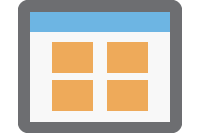

In [7]:
s2 = myhub.sites.get('6c477621242e47259577b19c5cf04c0d')
s2.item

### Linking a page to this site

Linking a page to a site is a two step process. First, you will fetch the page of interest, then you will link it to the site object with a slug for that page.

<Item title:"page space" type:Hub Page owner:mmajumdar_dcdev>
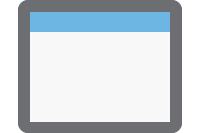

In [8]:
#Fetching a page
new_page = myhub.pages.get('1c75da020b2f4943a3f657ef59fc1bc8')
new_page.item

In [9]:
s1.pages.link(new_page, slug='linked page space')
s1.pages.search()

[<Page title:"page space" owner:mmajumdar_dcdev>]

### Unlinking a page from this site

Unlinking is useful when you have a page that is no longer needed for a site, but you do not wish to delete that page from the other sites it is linked to.

In [10]:
s1.pages.unlink(new_page)
s1.pages.search()

[]

### Editing the layout of this site

To edit a layout of a site, first fetch the layout of that site.

In [11]:
layout = s1.layout

In [12]:
layout.sections[1].style.background.color

'#3276ae'

As we can see, this section has a blue background color.

![image](https://user-images.githubusercontent.com/13968196/158464500-fbb3fa83-f091-41ba-b2eb-740a633a2078.png)


We can change it to a deep red by assigning the background color value and calling the `update_layout` method on the site object.

In [13]:
layout.sections[1].style.background.color = '#800000'
layout.sections[1].style.background.color

'#800000'

In [14]:
s1.update_layout(layout)

True

The background color is now a dark red.

![image](https://user-images.githubusercontent.com/13968196/158464917-76a90219-127b-4a74-ac3e-4c70de62f3e4.png)


### Editing title on the site

We can see the title of this site is 'New Initiative'.

![image](https://user-images.githubusercontent.com/13968196/158465157-4a16a154-eccd-4050-a33b-1afaed08f5d3.png)

To change this, we can fetch the card for this section and update it with the json for the new title 'A Sample Hub Initiative'.

In [15]:
layout.sections[0].rows[0].cards[0]

{'component': {'name': 'markdown-card', 'settings': {'schemaVersion': 1, 'markdown': '\n<br>\n<br>\n<br>\n<br>\n<br><h1 style="text-align: center;">New Initiative</h1><p style="text-align: center;"><br></p><p style="text-align: center;"><br></p><p style="text-align: center;">What will this initiative achieve if successful?</p>\n\n\n<br>\n<br>\n<br>\n<br>\n<br>'}}, 'width': 12, 'showEditor': False}

In [16]:
layout.sections[0].rows[0].cards[0] = {'component': {'name': 'markdown-card', 'settings': {'markdown': " <br> <br> <br> <br> <br><h1 style='text-align: center; '>A sample Hub Initiative</h1><p style='text-align: center; '><br></p><p style='text-align: center; '><br></p><p style='text-align: center; '>What will this initiative achieve if successful?</p> <br> <br> <br> <br> <br>"}}, 'width': 12, 'showEditor': False}
layout.sections[0].rows[0].cards[0]

{'component': {'name': 'markdown-card',
  'settings': {'markdown': " <br> <br> <br> <br> <br><h1 style='text-align: center; '>A sample Hub Initiative</h1><p style='text-align: center; '><br></p><p style='text-align: center; '><br></p><p style='text-align: center; '>What will this initiative achieve if successful?</p> <br> <br> <br> <br> <br>"}},
 'width': 12,
 'showEditor': False}

In [17]:
s1.update_layout(layout)

True

Now the title has successfully been changed.

![image](https://user-images.githubusercontent.com/13968196/213138931-409df3e5-019b-4805-a246-4ee00eb67ee7.png)

### Fetching sites with site domain

Sites can be fetched by their `itemid`. However, in cases where you do not have the `siteid` for a site that you have access to, you can fetch the item using the following command:

<Item title:"Aloha Challenge" type:Hub Site Application owner:bbutoaj>
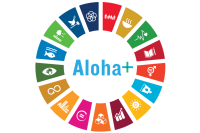

In [18]:
aloha = myhub.sites.get_by_domain('alohachallenge.hawaii.gov')
aloha.item

### Cloning an initiative/site in the same org

We clone an initiaitve in the same organization by passing the initiative object to the clone method.

In [19]:
i1_clone = myhub.initiatives.clone(i1)
i1_clone.item

<Item title:"A sample Hub Initiative1-copy-1688766859085" type:Hub Initiative owner:mmajumdar_dcdev>

### Cloning an initiative/site from Hub to Enterprise

Cloning an initiative to Enterprise requires signing into that organization and then cloning the site into it. You can clone a site by calling the clone method on the `sites` property of the target `GIS` object and providing a reference to the site object and an optional title. 

Note: Enterprise Sites are supported via the `sites` submodule of the `GIS`, and not the `apps.hub` submodule. 

In [21]:
gis_portal = GIS(profile='your_enterprise_profile')

Enter password: ········


In [22]:
s1_enterprise = gis_portal.sites.clone(s1, title='Cloned Example Enterprise Site')
s1_enterprise.item

<Item title:"Cloned Example Enterprise Site" type:Site Application owner:creator1>

Only the site item has been cloned in the new organization as this is an Enterprise organization. The Enterprise Site also comes with a Content Team group that helps you manage the items in your site's Content Library. Users with Administrative privileges that create a site will also have a Core Team group created as part of the site, to allow collaboration among members of that team. The script will automatically determine whether to give you an initiative or a site for your particular Hub.

### Deleting initiatives and sites

We will delete the initiatives and site created as part of this notebook to demonstrate the process of deletion. Deleting a site or initiative not only deletes the items but also the groups created initially. If a site has a page that is not linked to any other site, deleting the site also deletes the page.

In [23]:
i1.delete()

True

In [24]:
i1_clone.delete()

True

In [25]:
s1_enterprise.delete()

True